In [1]:
#include in the begining to ensure that everything runs smootly

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#Importing nssary libraries

from fastai import*
from fastai.vision import*

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

### Get the Data

In [4]:
#help function can help you remeber what each function does
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS)

In [6]:
path

PosixPath('/storage/oxford-iiit-pet')

Now lets see whats inside of this

In [7]:
path.ls()

[PosixPath('/storage/oxford-iiit-pet/images'),
 PosixPath('/storage/oxford-iiit-pet/annotations')]

Now lets get both files seperatly

In [8]:
#seperates the two files
path_anno = path/"annotations"
path_img = path/"images"

We want to classify each image based on the file name thats given to the picture

In [9]:
fnames = get_image_files(path_img)
fnames

[PosixPath('/storage/oxford-iiit-pet/images/Russian_Blue_263.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/pug_34.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/saint_bernard_58.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/Bengal_173.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/english_cocker_spaniel_99.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/Birman_194.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/german_shorthaired_181.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/leonberger_83.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/basset_hound_191.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/american_bulldog_139.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/shiba_inu_175.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/german_shorthaired_93.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/saint_bernard_72.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/pug_35.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/english_cocker_spa

to do this we can use a built in function called ImageDataBunch.from_name_re that will get the labels from the file names using re

In [10]:
#randomize the data
np.random.seed(2)
#get the labels
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
help(ImageDataBunch)

Help on class ImageDataBunch in module fastai.vision.data:

class ImageDataBunch(fastai.basic_data.DataBunch)
 |  DataBunch suitable for computer vision.
 |  
 |  Method resolution order:
 |      ImageDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  batch_stats(self, funcs:Collection[Callable]=None, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>) -> torch.Tensor
 |      Grab a batch of data and call reduction function `func` per channel
 |  
 |  normalize(self, stats:Collection[torch.Tensor]=None, do_x:bool=True, do_y:bool=False) -> None
 |      Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  create_from_ll(lls:fastai.data_block.LabelLists, bs:int=64, val_bs:int=None, ds_tfms:Union[Callable, Collection[Callable], NoneType]=None, num_workers:int=8, dl_tfms:Union[Coll

In [12]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
# VAR = ImageDataBunch.from_name_re(the image, the file names, the re pattern to extract label, transform, image size( to speed up), bs). Normlize the data

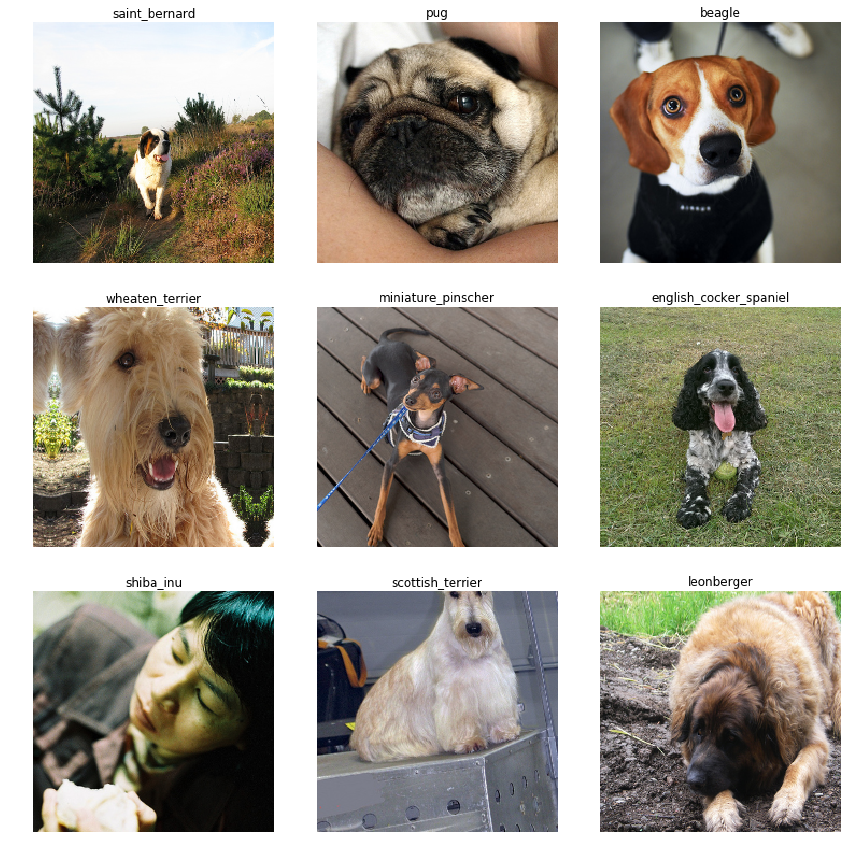

In [13]:
#show part of the data 
data.show_batch(rows = 3,  fig = (7,6))

Now lets see the doffrent classes of data

In [14]:
print(data.classes)
len(data.classes),data.c
#data.classes is the labels of the data
#data.c is used to see how much of it is even there

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Train the Model

We will use a convolutional Neural Network to train our images the images will be in the input and the output the predicted probability of each breed

In [15]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)
# VAR  = TYPEOFMODEL(DATA, MODEL, the way you messure error)

In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
learn.fit_one_cycle(4)
#we want to fit the data for 4 epochs(4 cycles)

epoch,train_loss,valid_loss,error_rate,time
0,1.391723,0.363049,0.118403,00:28
1,0.604820,0.284137,0.089986,00:27
2,0.372259,0.261600,0.077808,00:27
3,0.285528,0.249518,0.074425,00:27


In [18]:
#now lets save this trained model 
learn.save("stage-1")

###  Results

Now lets see where the model messed up

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
# VAR = ClassificationInterpretation.from_learner(predefined_trained_model)

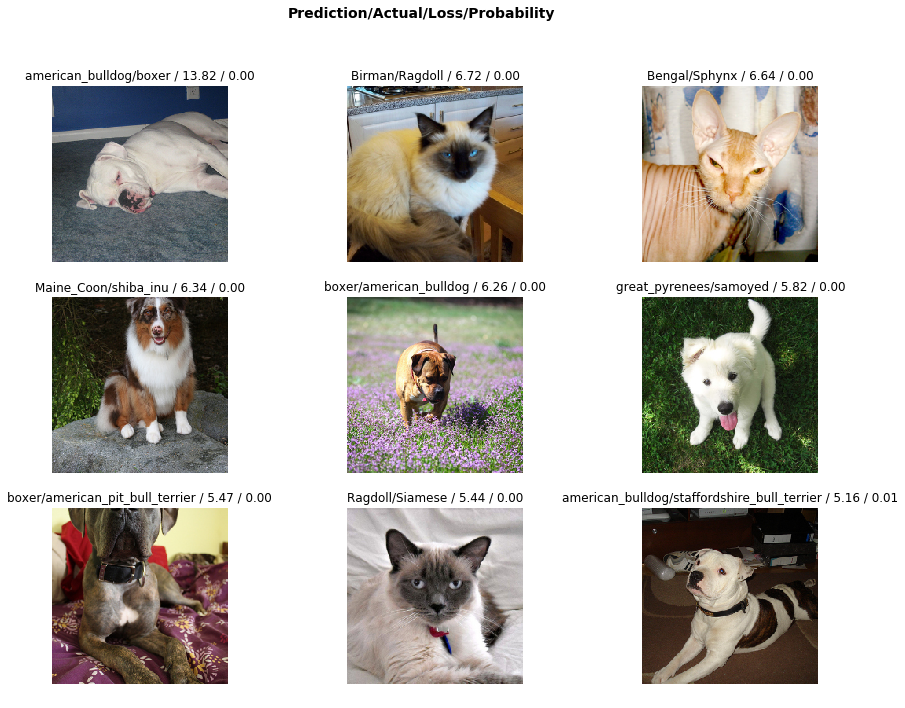

In [20]:
interp.plot_top_losses(9, figsize = (15,11))
#just plots the most missed ones
#prediction, actual, loss, and probability of actual class.

In [21]:
doc(interp.plot_top_losses)
#will pull up documentation for the function(similar to help function)

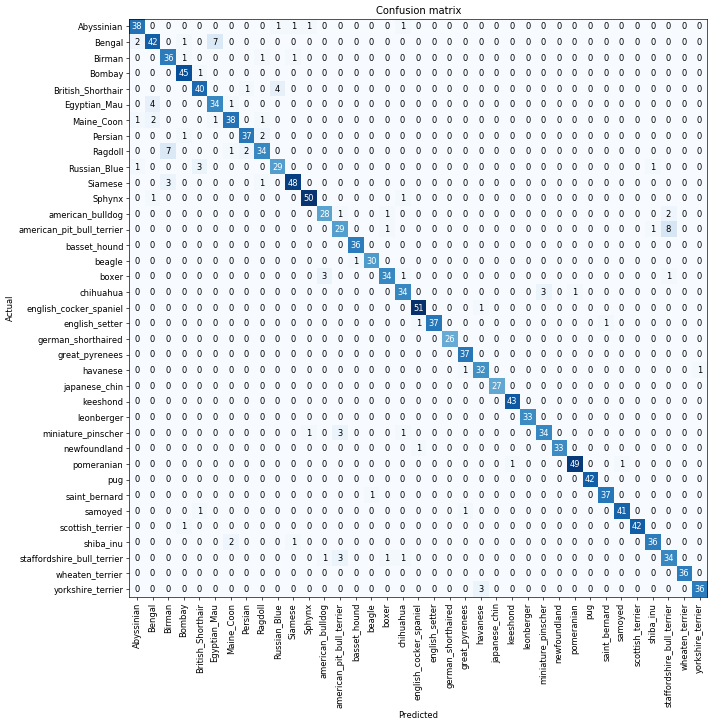

In [22]:
interp.plot_confusion_matrix(figsize = (12,12), dpi=60)
#can be used to compare the confused stuff

In [23]:
doc(interp.plot_confusion_matrix)

In [24]:
#can also do  simple function compared to confusion matrix
interp.most_confused(min_val=2) # min_val is minum times bing confused

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Bengal', 'Egyptian_Mau', 7),
 ('Ragdoll', 'Birman', 7),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('shiba_inu', 'Maine_Coon', 2)]

### Fine-Tuning

In [25]:
#since the model is still runing, to continue to train it lets unfreeze the model
learn.unfreeze()

In [26]:
#train it a little bit more
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.690351,0.410534,0.125846,00:29


In [27]:
# it got worse after this round so lets get old save back
learn.load('stage-1');

In [28]:
doc(learn.lr_find)

In [29]:
learn.lr_find() #will find the learning rate

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


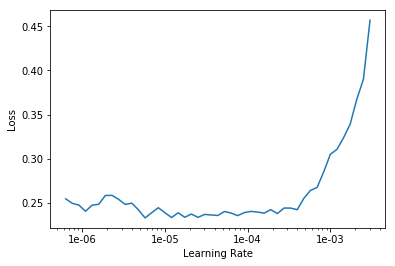

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(2, max_lr= slice(1e-6,1e-4))  #in range of 1e-6 - 1e-4

epoch,train_loss,valid_loss,error_rate,time
0,0.250204,0.237169,0.073072,00:27
1,0.228304,0.239611,0.072395,00:27


### train a resnet-50

a resnet 50 will be more accurate due to having more layers

In [36]:
doc(ImageDataBunch)

In [39]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [48]:
learn = cnn_learner(data, models.resnet50, metrics= error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


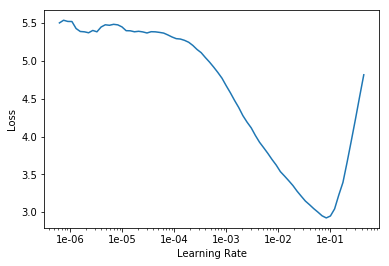

In [49]:
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.707741,0.331377,0.098782,01:14
1,0.505929,0.306226,0.089986,01:14
2,0.426778,0.275769,0.077808,01:14
3,0.364358,0.244316,0.071719,01:14
4,0.267958,0.241511,0.069012,01:14
5,0.179167,0.199989,0.057510,01:14
6,0.122160,0.197204,0.057510,01:14
7,0.105492,0.192782,0.056834,01:14


In [52]:
learn.save('stage-1-50');

fine tuning

In [53]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.099469,0.186091,0.057510,01:41
1,0.099801,0.180232,0.052097,01:40
2,0.079927,0.181827,0.054127,01:40


In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [56]:
interp.most_confused(min_val = 2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'beagle', 2)]

### Reminder of Steps

1. Load the data with the untar_data
2. find what is contained in the data and sperate the images and labels
3. Use the ImageDataBunch function to create the data and create training and validation sets
4. define and fit the model
5. Model what is going wrong and model it (using confusionmatrix or most_confused)
6. fine tune the model by finding the learning rate
7. possibly find a new model